# Stage S5 :

${} \;$ 

$$\textbf{BRADAI Zakaria} \quad \quad - \quad \quad \textbf{MALANDA Sam-Rayden}$$

$$\textbf{L3 Physique SPRINT}$$

$$\textbf{Encadrant : Matthieu Delbecq}$$

$$\textbf{Laboratoire d'accueil : LPENS - équipe Circuits Quantiques Hybrides HQC}$$

${} \;$

${} \;$

#    $$\text{Le gyroscope en tant qu'analogue mécanique d'un Spin 1/2}$$


${} \;$

${} \;$

---------
---
---

In [1]:
from GyroSolver import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

df = pd.read_csv('RabiX.csv')

tab = df.to_numpy()
tab = np.delete(tab, [0], axis=1)   
tab_theta = np.cos(tab)

#tab_theta = np.delete(tab_theta, [0], axis=1)   


tab_t_burst = np.linspace(0, 20, 101, endpoint=True)
#exc_freq = np.linspace(0.23, 0.31, 26, endpoint=True)
exc_freq = np.linspace(0.75, 1.35, 101, endpoint=True)
tab_freq = exc_freq

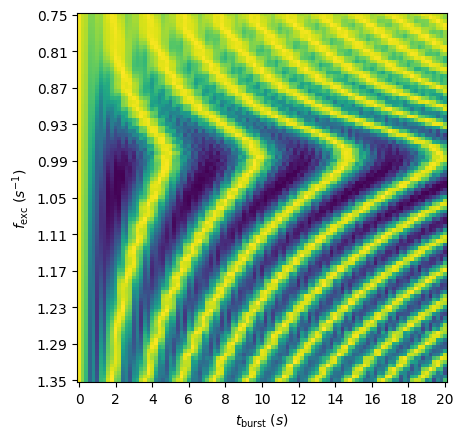

In [5]:
plt.figure()
plt.imshow(np.cos(tab))
plt.xticks(np.arange(0, 101, 10), tab_t_burst[np.arange(0, 101, 10)].astype(int) ) 
plt.yticks(np.arange(0, 101, 10), exc_freq[np.arange(0, 101, 10)].round(4) ) 


plt.xlabel(r'$t_\text{burst} \; (s)$')
plt.ylabel(r'$f_\text{exc} \; (s^{-1})$')

plt.savefig('RabiX.png')

plt.show()


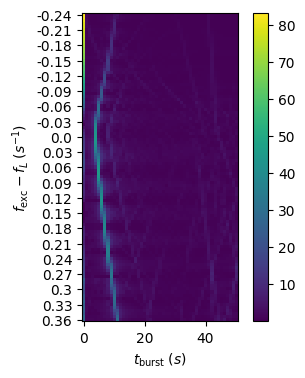

In [4]:
signal = tab_theta
fourier = np.fft.rfft(signal)

n = signal.size
sample_rate = 100
freq_Benji = np.fft.rfftfreq(n, d=1/sample_rate)

A = tab_freq[np.arange(0, 101, 5)] - 0.99

plt.figure(figsize=[4 ,4])
plt.yticks(np.arange(0, 101, 5), A.round(4) ) 
#plt.xticks(np.arange(0, 51, 5), tab_convert_freq[np.arange(0, 51, 5)].round(1))
plt.imshow(np.abs(fourier))
plt.colorbar()
plt.xlabel(r'$t_\text{burst} \; (s)$')
plt.ylabel(r'$f_\text{exc} - f_L \; (s^{-1})$')
plt.show()

# I- Introduction :

Ce stage est réalisé dans le cadre de l'UE LU3PY205 du S5, au sein de l'équipe Circuits Quantiques Hybrides $HCQ$ du Laboratoire de Physique de l'École Normale Supérieure d'Ulm $LPENS$, sous l'encadrement du Dr. Matthieu Delbecq.

# II- Mouvement libre du Gyroscope :

Comme il a été détaillé dans l'étude théorique, l'Hamiltonien du système $\{\text{Gyroscope}\}$ dans le référentiel du laboratoire supposé galiléen est :

$$\mathcal{H}_\text{libre} = \dfrac{p_\theta^2}{2 \tilde{J_1}} + \dfrac{p_\psi^2}{2 J_3} + \dfrac{\left( p_\varphi - \cos(\theta)p_\psi \right)^2}{2\tilde{J_1} \sin^2(\theta)} + mgh\cos(\theta) $$

Cet Hamiltonien peut se mettre sous la forme plus commode :

$$\mathcal{H}_\text{libre} = \mathcal{T}_\psi + \mathcal{T}_\theta + \mathcal{N} - \overrightarrow{PG} \cdot m\overrightarrow{g} $$

Où $\mathcal{T}_\psi$ représente l'énergie de rotation "propre", $\mathcal{T}_\theta$ l'énergie de rotation dûe à la Nutation (variation de la colatitude $\theta$), et enfin $\mathcal{N}$ le terme divergent responsable de la Nutation. 

On intoduit les moments conjugués aux angles d'Euler :

$$ \left\{ \begin{array}{r c l c l} 
p_\theta & = & \tilde{J}_1 \dot{\theta}  \\
p_\varphi & = & \tilde{J}_1 \sin^2(\theta) \dot{\varphi} + \cos(\theta) p_\psi  \\
p_\psi & = &  J_3\left( \dot{\psi} + \cos(\theta) \dot{\varphi} \right)
\end{array}   \right. $$  

Où $\tilde{J}_1 = J_1 + mh^2$

$\;$



Pour la simulation numérique, on déduit les équations du mouvement à partir des équation de Hamilton, on alors :



$$ \left\{ \begin{array}{r c l c l} 
\ddot{\theta} & = & \dfrac{mgh}{\tilde{J_1}} \sin(\theta) + \dfrac{p_\psi }{\tilde{J_1}}  \sin(\theta) \dot{\varphi}+\sin(\theta)\cos(\theta) (\dot{\varphi})^2  \\
\ddot{\varphi} & = & -\dfrac{2}{\tan(\theta)}\dot{\theta}\dot{\varphi} + \dfrac{p_\psi}{\tilde{J_1} \sin(\theta)}\dot{\theta}   \\
\ddot{\psi} & = &  \dfrac{1+\cos^2(\theta)}{\sin(\theta)}\dot{\theta}\dot{\varphi} - \dfrac{p_\psi}{\tilde{J_1} \tan(\theta)}\dot{\theta} 
\end{array}   \right. $$  



On obtient ainsi un système de 3 équations différentielles non-linéraires couplées d'ordre 1. ???


Les paramètres du problème sont estimés à partir des valeurs constructeurs du Gyroscope.


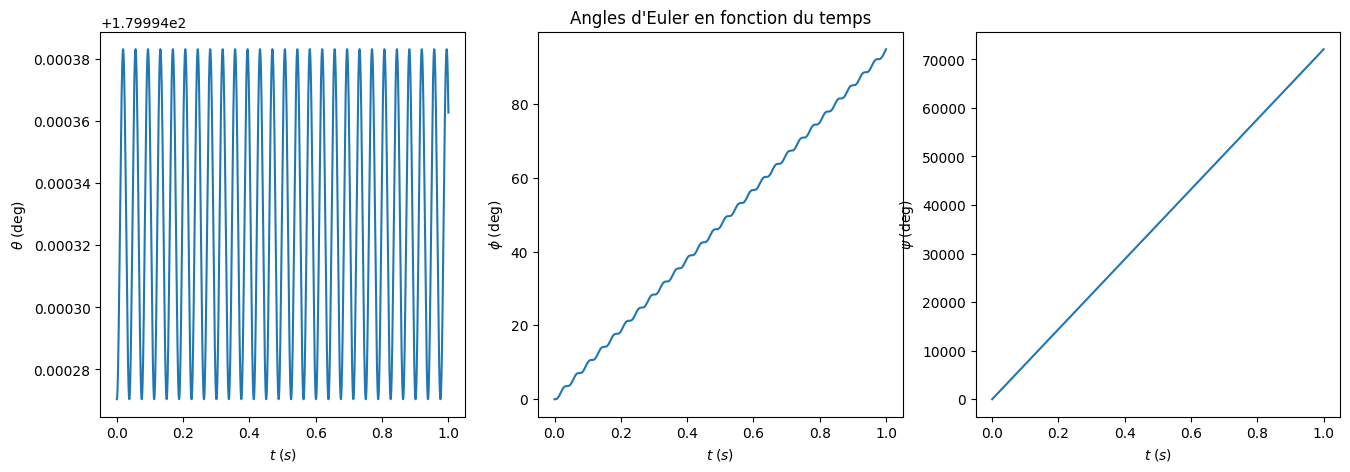

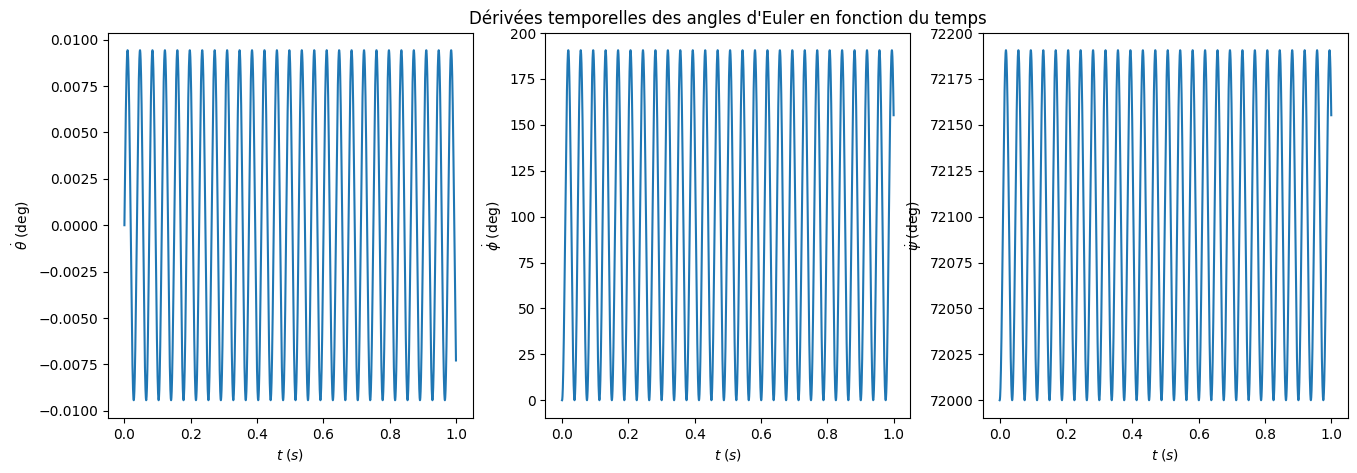

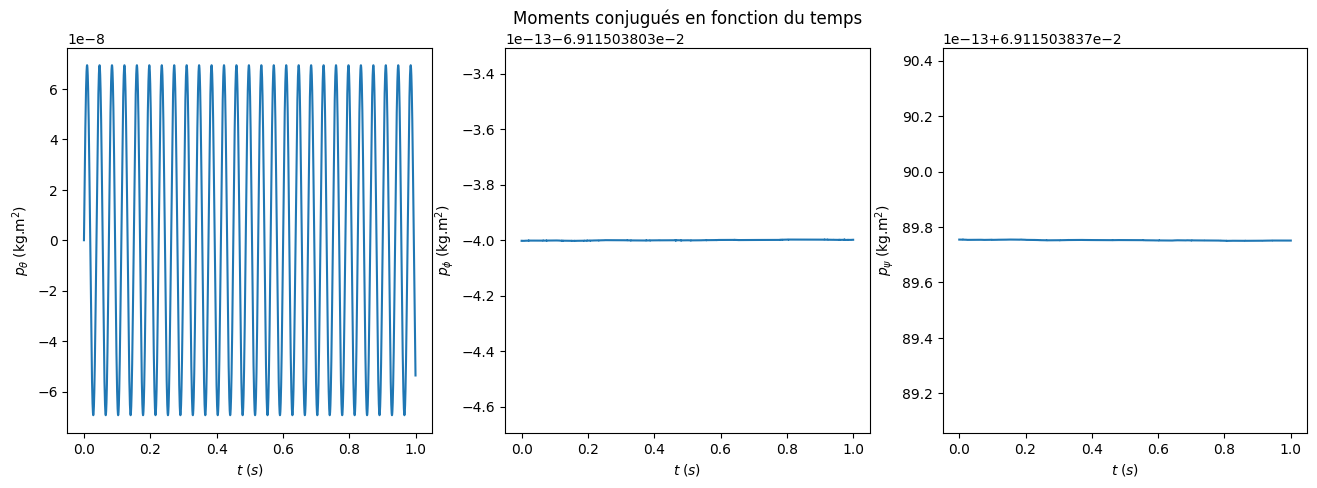

In [5]:
g = 9.81           # m/s^2
m = 0.375          # kg
J3 = 0.000055      # kg.m^2
J1 = 0.000055      # kg.m^2
h = 31.25 * 1e-3   # m
x0 =  0.1
f_exc = 0.1
p = 0.1

params = [g, m, h, J1, J3, x0, p, f_exc]
#CI = [np.pi / 6, 0, 0, 9.936, 0, 2 * np.pi * 200]
CI = [np.pi-0.0001, 0, 0, 0, 0, 2 * np.pi * 200]

t, the_free, phi_free, psi_free, the_d_free, phi_d_free, psi_d_free = Solve_Gyro(0, 1, CI, params, 
                                    solving_method='RK23', forcing='FREE', nb_points=10000)

p_the_free, p_phi_free, p_psi_free = Conjugated_Momentums(the_free, phi_free, 
                                    psi_free, the_d_free, phi_d_free, psi_d_free, params)

Plot_Gyro_Angles(t, the_free, phi_free, psi_free)

Plot_Gyro_Speed_Angles(t, the_d_free, phi_d_free, psi_d_free)

Plot_Gyro_Momentum(t, p_the_free, p_phi_free, p_psi_free)



In [6]:
#path_Free = Get_Path(t, the_free, phi_free, psi_free)
#path_Free

$\;$

On note $\left( \vec{u}_\theta, \vec{u}_\varphi, \vec{u}_\psi \right)$ les vecteurs normées associées aux rotations des angles d'Euler, ils sont donnés dans la base cartésienne $\beta$ par :

$$\left\{  \begin{array}{r c l} 
\vec{u}_\theta & = & \left[ \cos(\varphi), \; \sin(\varphi), \; 0 \right]_\beta = \vec{u}_\rho \\
\vec{u}_\varphi & = & \left[ 0, \; 0, \; 1 \right]_\beta = \vec{u}_z  \\
\vec{u}_\psi & = & \left[ \sin(\theta)\sin(\varphi), \; -\sin(\theta) \cos(\varphi), \; \cos(\theta) \right]_\beta
\end{array} \right .   $$

Le poids $\vec{P}$ qui donne naissance à la précession exerce un moment que l'on note $\Gamma(\vec{P})$ donné par :

$$ \Gamma(\vec{P}) = mgh\sin(\theta) \vec{u}_\theta $$

$\;$

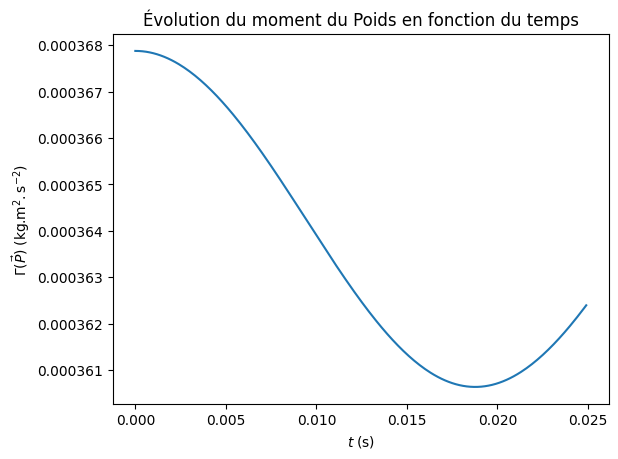

In [7]:
Gamma_P = Momentum_Weight(the_free, phi_free, psi_free, params)

plt.figure()
plt.plot(t[:250], Gamma_P[:250])
plt.xlabel(r'$t \; (\text{s})$')
plt.ylabel(r'$\Gamma(\vec{P}) \; (\text{kg.m}^2.\text{s}^{-2})$')
plt.title('Évolution du moment du Poids en fonction du temps')
plt.show()

0.0


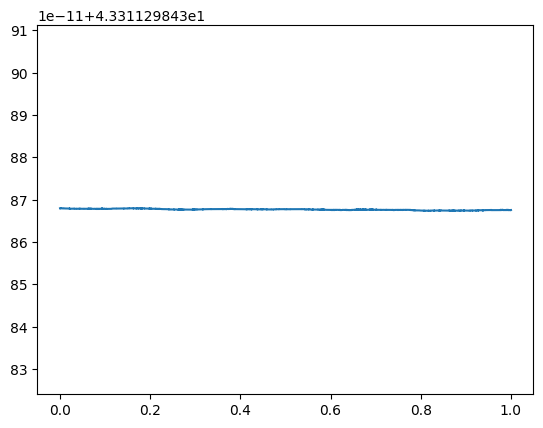

In [9]:
Ec_theta, Ec_psi, Nutation, Epp, E_ext = Hamiltonian_Terms(t, the_free, phi_free, psi_free, 
                the_d_free, phi_d_free, psi_d_free, params, forcing='FREE')

H_free = Ec_theta + Ec_psi + Nutation + Epp

print(np.mean(E_ext))

plt.figure()
plt.plot(t, H_free)


$\;$

$\;$

---------


$\;$

$\;$

# III- Mouvement Forcé :

Comme il a été détaillé dans l'étude théorique, l'Hamiltonien du système $\{\text{Gyroscope}\}$ dans le référentiel du laboratoire supposé galiléen est pour un forçage selon XY :

$$\mathcal{H} = \mathcal{H}_\text{libre} - mhx_0\omega^2 \sin(\omega t + \Phi - \varphi) \sin(\theta) $$

Les équations du mouvement deviennent donc :

$$ \left\{ \begin{array}{r c l c l} 
\ddot{\theta} & = & \dfrac{mgh}{\tilde{J_1}} \sin(\theta) + \dfrac{p_\psi }{\tilde{J_1}}  \sin(\theta) \dot{\varphi}+\sin(\theta)\cos(\theta) (\dot{\varphi})^2 - \dfrac{mhx_0\omega^2}{\tilde{J}_1}\cos(\theta) \sin(\omega t + \Phi - \varphi) \\
\ddot{\varphi} & = & -\dfrac{2}{\tan(\theta)}\dot{\theta}\dot{\varphi} + \dfrac{p_\psi}{\tilde{J_1} \sin(\theta)}\dot{\theta} + \dfrac{mhx_0\omega^2}{\tilde{J}_1}\dfrac{\cos(\omega t + \Phi - \varphi)}{\sin(\theta)}   \\
\ddot{\psi} & = &  \dfrac{1+\cos^2(\theta)}{\sin(\theta)}\dot{\theta}\dot{\varphi} - \dfrac{p_\psi}{\tilde{J_1} \tan(\theta)}\dot{\theta} - \dfrac{mhx_0\omega^2}{\tilde{J}_1} \dfrac{\cos(\omega t+\Phi -\varphi)}{\tan(\theta)}
\end{array}   \right. $$ 

In [8]:
CI = [np.pi / 12, 0, 0, 0, 0, 2 * np.pi * 200]
x0 =  10 * 1e-2     # m
f_exc = 0.265          # s^-1        
p = np.pi         # rad

params = [g, m, h, J1, J3, x0, p, f_exc]

Gyro_Carac_Values(params, CI)

Larmor Pulsation (th) :               +1.663
Larmor Frequency (th) :               +0.265
Larmor Period (th) :               +3.777 

Rabi Pulsation (th) :               +0.024
Rabi Period (th) :             +267.331
Temps de montée (th) :             +133.666 

Rapport des pulsations Larmor/Rabi :              +70.770 

Rapport Approx Gyroscopique :          +14_912.892 



Duration : 4.306818962097168


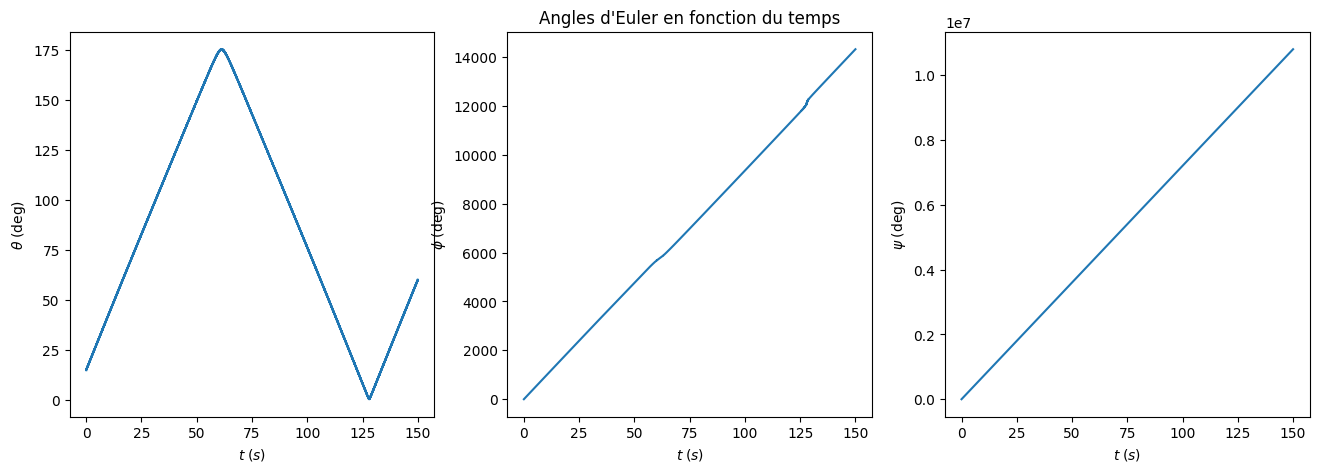

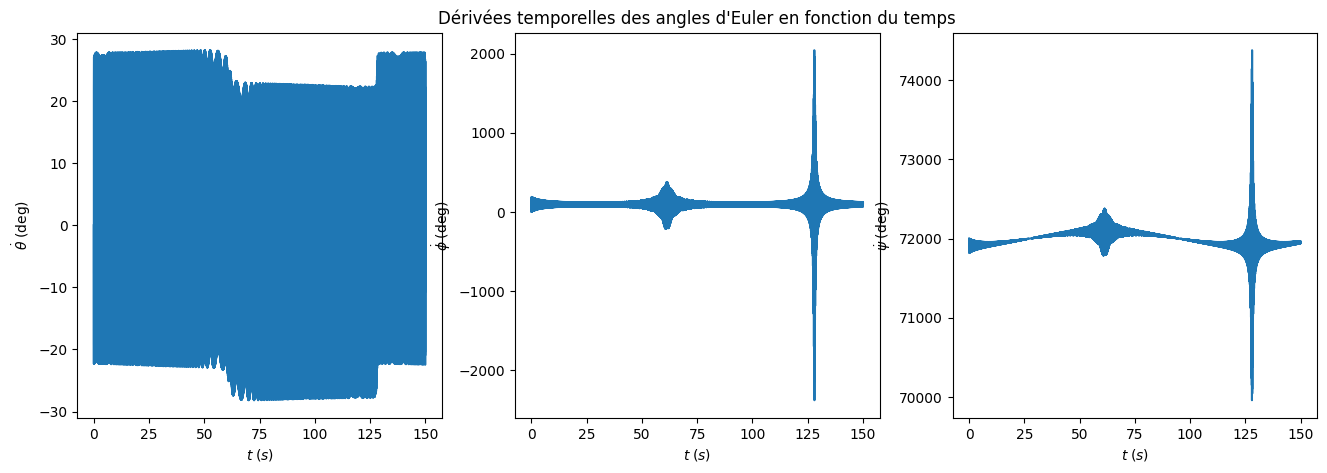

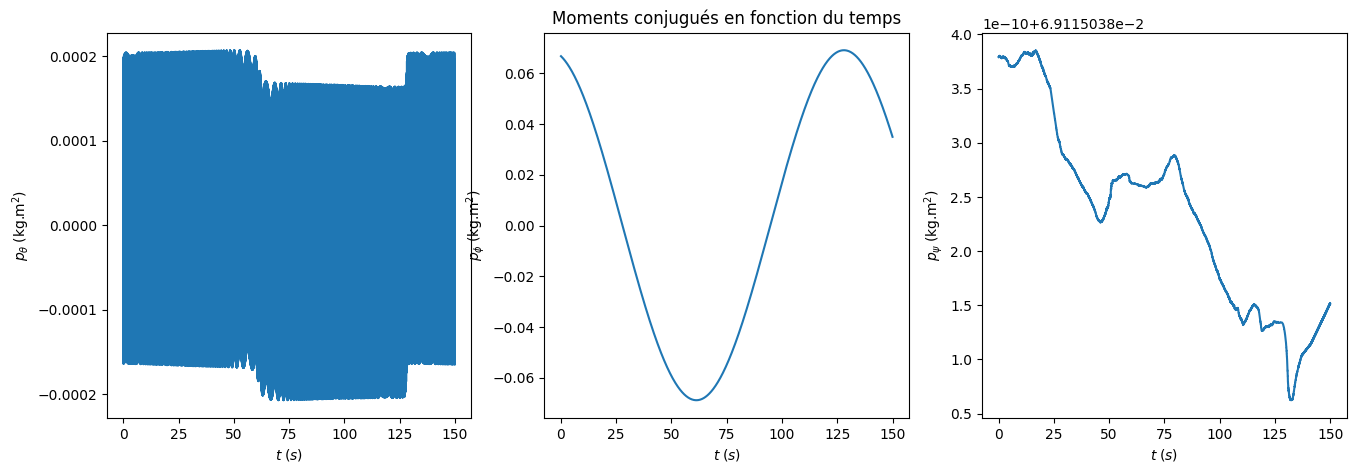

In [9]:
from time import time
t1 = time()
t, the, phi, psi, the_d, phi_d, psi_d = Solve_Gyro(0, 150, CI, params, solving_method='RK23', forcing='XY', nb_points=10000)
t2 = time()
print('Duration :', t2-t1)

path_Forced = Get_Path(t, the, phi, psi)
#path_Forced

p_the, p_phi, p_psi = Conjugated_Momentums(the, phi, psi, the_d, phi_d, psi_d, params)

Plot_Gyro_Angles(t, the, phi, psi)

Plot_Gyro_Speed_Angles(t, the_d, phi_d, psi_d)

Plot_Gyro_Momentum(t, p_the, p_phi, p_psi)



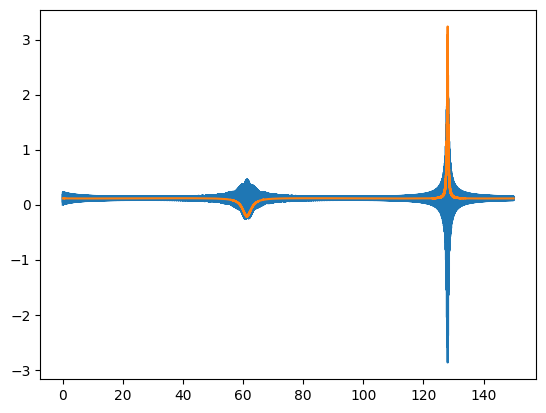

In [29]:
PPSI = p_psi[0]
omega_exc = 2*np.pi*f_exc
plt.figure()
plt.plot(t, phi_d * PPSI)
plt.plot(t, m*g*h - np.sqrt(70) * m*(omega_exc**2)*h*x0 * np.sin(omega_exc*t + p - phi) / np.tan(the) )

In [32]:
np.mean(phi_d)

1.6657947233299881

In [11]:
print(m*g*h / PPSI)
print(np.mean(phi_d))

1.6633274059639487
1.6657947233299881


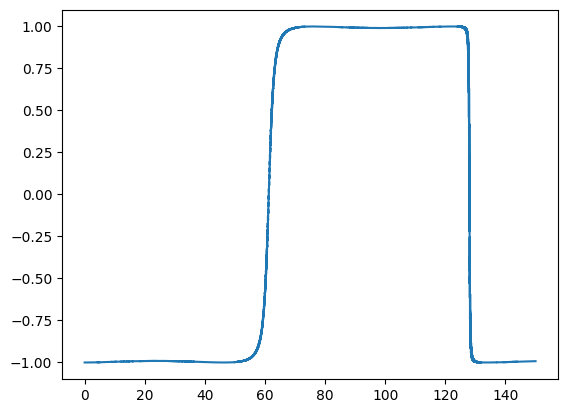

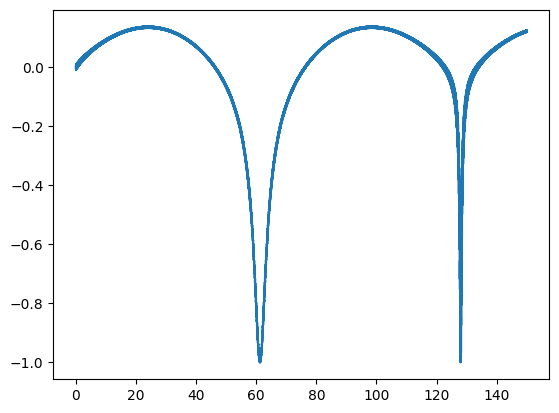

In [15]:
plt.figure()
plt.plot(t, np.cos(omega_exc*t + p - phi))

plt.figure()
plt.plot(t, np.sin(omega_exc*t + p - phi))

In [24]:
print(np.mean(p_psi) / (J3 *omega_exc))

754.7169795399678


$\;$

En plus du poids, un peseudo-force d'entraînement $\vec{F}_e = -m\vec{a}_e$ s'applique sur le Gyroscope, son expression est donnée pour des forçages X et XY :

$$ \vec{F}_X = \omega^2 mx_0 \cos(\omega t + \Phi)\vec{u_x} $$
$$ \vec{F}_{XY} = \omega^2 mx_0 \left[\cos(\omega t + \Phi)\vec{u_x} + \sin(\omega t + \Phi)\vec{u_y} \right]$$

Elle exerce un moment $\Gamma(\vec{F}_e)$ donné pour un forçage XY par :

$$ \left \{ \begin{array}{r c l} 
\Gamma(\vec{F}_e) \cdot \vec{u}_\theta & = &   -\omega^2 m x_0 \sin(\omega t+\Phi - \varphi)\cos(\theta) \\
\Gamma(\vec{F}_e) \cdot \vec{u}_\varphi & = &  \omega^2 m x_0 \cos(\omega t+\Phi - \varphi)\sin(\theta)    \\
\Gamma(\vec{F}_e) \cdot \vec{u}_\psi & = &   0  
\end{array}  \right. $$



Pour un forçage X :

$$ \left \{ \begin{array}{r c l} 
\Gamma(\vec{F}_e) \cdot \vec{u}_\theta & = &   \omega^2 m x_0 \sin(\varphi)\cos(\omega t + \Phi)\cos(\theta) \\
\Gamma(\vec{F}_e) \cdot \vec{u}_\varphi & = &  \omega^2 m x_0 \cos(\varphi)\cos(\omega t+\Phi )\sin(\theta)    \\
\Gamma(\vec{F}_e) \cdot \vec{u}_\psi & = &   0  
\end{array}  \right. $$


$\;$

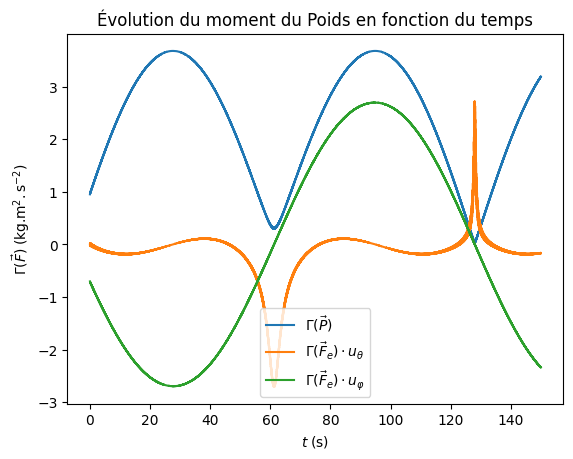

In [12]:
Gamma_P = Momentum_Weight(the, phi, psi, params)
Gamma_Fe_the, Gamma_Fe_phi  = Momentum_Fe(t, the, phi, psi, params)

plt.figure()
plt.plot(t, Gamma_P, label=r'$\Gamma(\vec{P})$')
plt.plot(t, Gamma_Fe_the, label=r'$\Gamma(\vec{F}_e) \cdot u_\theta$')
plt.plot(t, Gamma_Fe_phi, label=r'$\Gamma(\vec{F}_e) \cdot u_\varphi$')

plt.xlabel(r'$t \; (\text{s})$')
plt.ylabel(r'$\Gamma(\vec{F}) \; (\text{kg.m}^2.\text{s}^{-2})$')
plt.title('Évolution du moment du Poids en fonction du temps')
plt.legend()
plt.show()

### Assymétrie du forçage :

Estimated time : 204


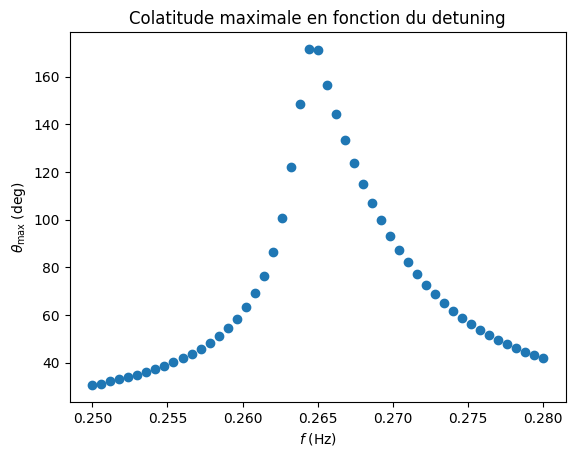

236.28213715553284


In [8]:
#tab_freq_sweep = np.arange(0.25, 0.29, 0.001) 
tab_freq_sweep = np.linspace(0.25, 0.28, 51) 
print('Estimated time :', len(tab_freq_sweep) * 4)
t1 = time()
f_max, exc_freq, tab_theta, tab_theta_min, tab_t = Frequency_Sweep_MAX(tab_freq_sweep, params, CI, tf=150
                        , solving_method='RK23', plot=True, forcing='X')
t2 = time()
print(t2 - t1)

### Démonstration Cobra :

Explain : $\dfrac{\pi}{2} \to t_\text{dem} \to -\dfrac{\pi}{2}$

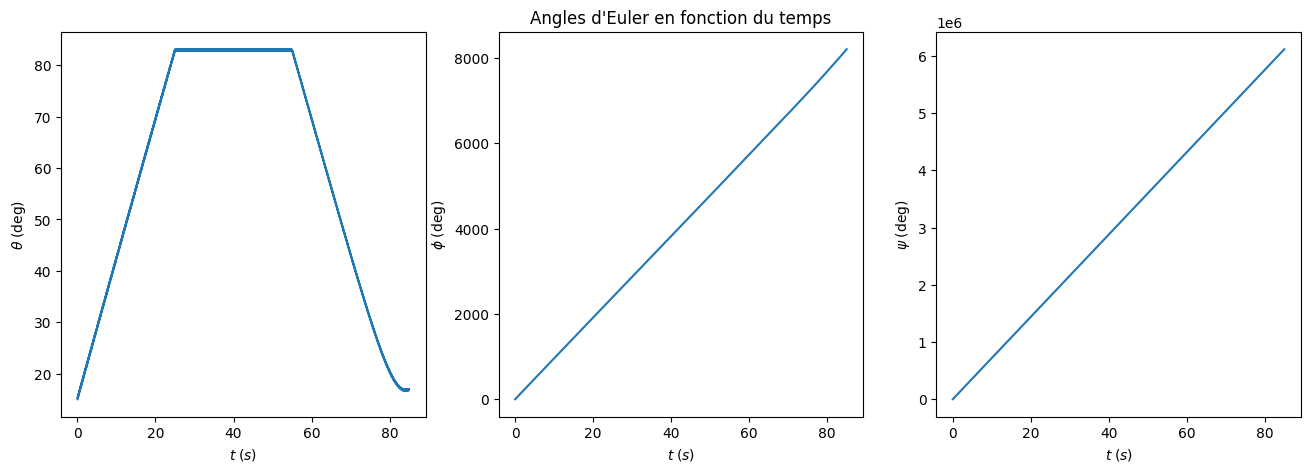

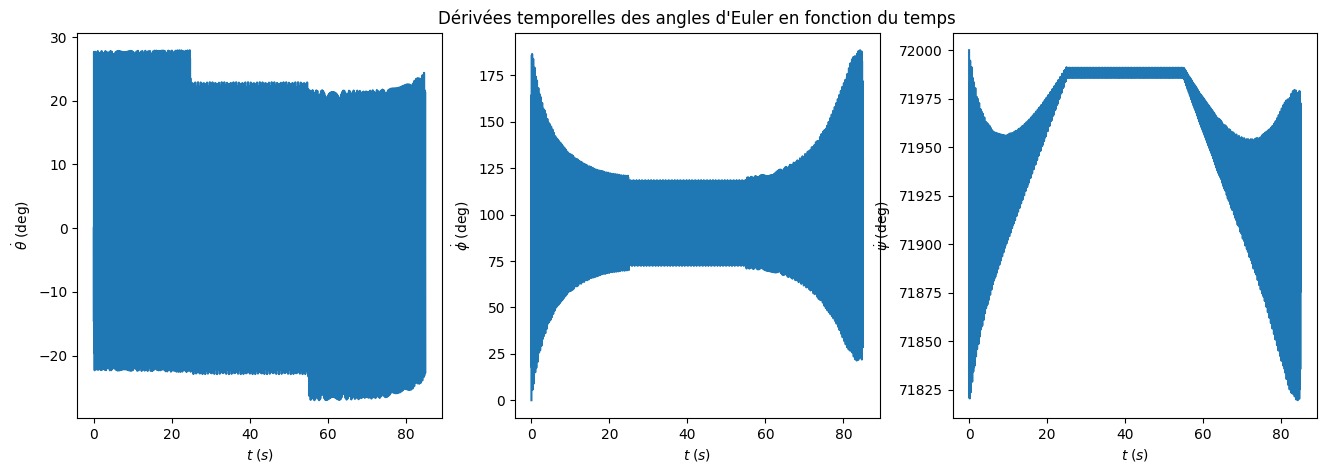

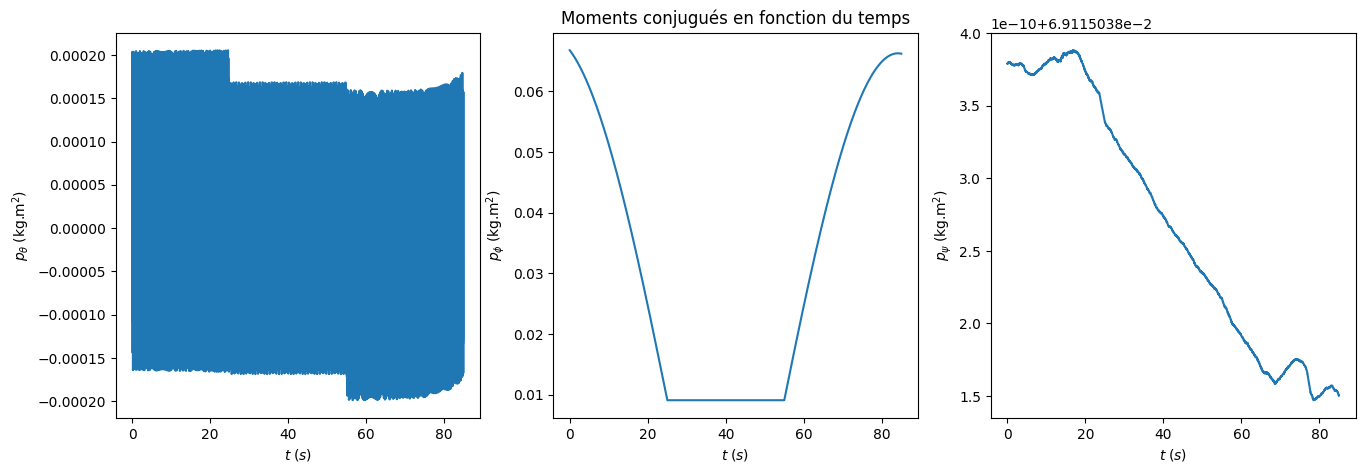

In [29]:
CI = [np.pi / 12, 0, 0, 0, 0, 2 * np.pi * 200]
x0 =  10 * 1e-2     # m
f_exc = 0.265          # s^-1        
p = np.pi         # rad

params = [g, m, h, J1, J3, x0, p, f_exc]

dt1 = 25
dt2 = 30
dt3 = 30

t_Cobra, the_Cobra, phi_Cobra, psi_Cobra, the_d_Cobra, phi_d_Cobra, psi_d_Cobra = Cobra(dt1, dt2, dt3, CI, params, forcing='XY', list_solving_method=['RK23'] * 3, list_nb_points=[1000] * 3)

path_Cobra = Get_Path(t_Cobra, the_Cobra, phi_Cobra, psi_Cobra)
#path_Forced

p_the_Cobra, p_phi_Cobra, p_psi_Cobra = Conjugated_Momentums(the_Cobra, phi_Cobra, psi_Cobra, the_d_Cobra, phi_d_Cobra, psi_d_Cobra, params)

Plot_Gyro_Angles(t_Cobra, the_Cobra, phi_Cobra, psi_Cobra)

Plot_Gyro_Speed_Angles(t_Cobra, the_d_Cobra, phi_d_Cobra, psi_d_Cobra)

Plot_Gyro_Momentum(t_Cobra, p_the_Cobra, p_phi_Cobra, p_psi_Cobra)




In [12]:
#path_Cobra

## Chevrons de Rabi (too long):

In [84]:
CI = [np.pi / 12, 0, 0, 0, 0, 2 * np.pi * 50]
x0 =  10 * 1e-2     # m
f_exc = 1.06         # s^-1        
p = np.pi         # rad

params = [g, m, h, J1, J3, x0, p, f_exc]

Gyro_Carac_Values(params, CI)

Larmor Pulsation (th) :               +6.653
Larmor Frequency (th) :               +1.059
Larmor Period (th) :               +0.944 

Rabi Pulsation (th) :               +1.504
Rabi Period (th) :               +4.177
Temps de montée (th) :               +2.089 

Rapport des pulsations Larmor/Rabi :               +4.423 

Rapport Approx Gyroscopique :             +932.056 



Duration : 0.18460583686828613


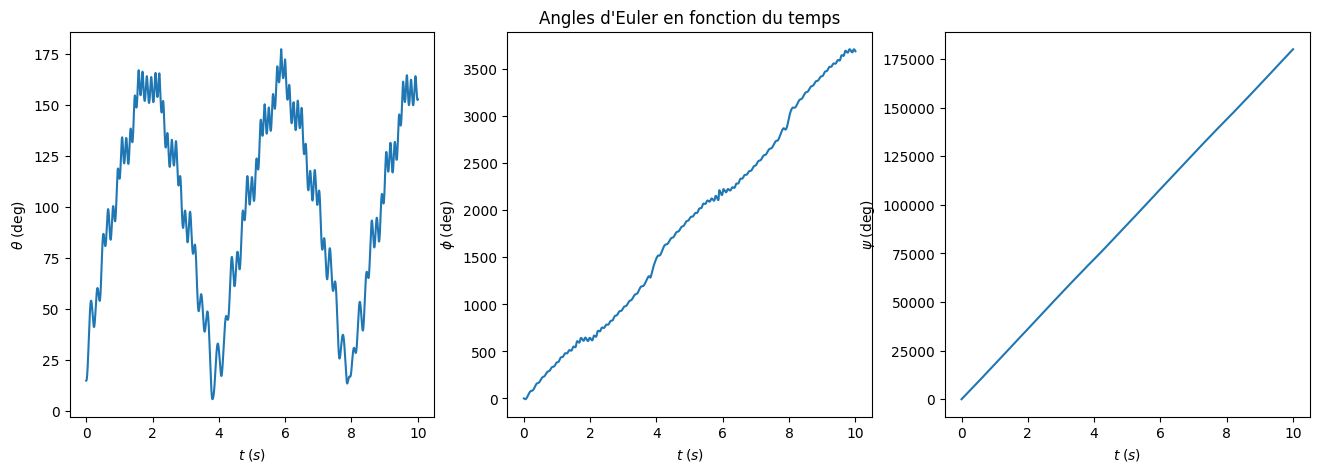

In [85]:
t1 = time()
t_, the_, phi_, psi_, the_d_, phi_d_, psi_d_ = Solve_Gyro(0, 10, CI, params, solving_method='RK23', forcing='X', nb_points=10000)
t2 = time()
print('Duration :', t2-t1)

path_Forced = Get_Path(t_, the_, phi_, psi_)
#path_Forced

p_the_, p_phi_, p_psi_ = Conjugated_Momentums(the_, phi_, psi_, the_d_, phi_d_, psi_d_, params)

Plot_Gyro_Angles(t_, the_, phi_, psi_)

#Plot_Gyro_Speed_Angles(t_, the_d_, phi_d_, psi_d_)

#Plot_Gyro_Momentum(t_, p_the_, p_phi_, p_psi_)

In [119]:
tab_t_burst = np.linspace(0, 20, 101, endpoint=True)
#exc_freq = np.linspace(0.23, 0.31, 26, endpoint=True)
exc_freq = np.linspace(0.75, 1.35, 101, endpoint=True)
#exc_freq = np.array([1.06])
print('Estimated time in minutes =', len(exc_freq) * 8 / 60)

Estimated time in minutes = 13.466666666666667


In [120]:
t1 = time()
tab_theta, list_the, list_t = Rabi_Chevron(exc_freq, tab_t_burst, params, CI, 
                                           solving_method='RK23', forcing='X')
t2 = time()
print('Duration =', t2 - t1)

Duration = 1420.2241489887238


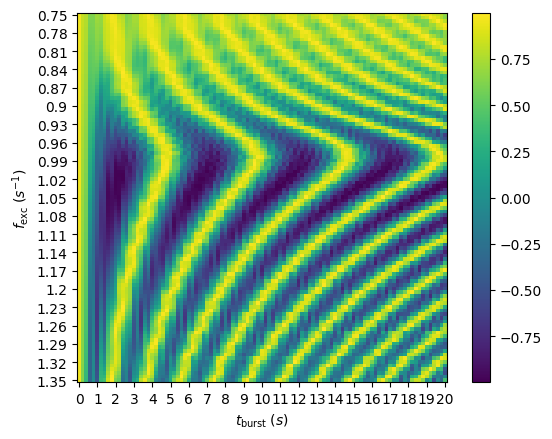

In [127]:
plt.figure()
plt.imshow(np.cos(tab_theta))
plt.colorbar()
plt.xticks(np.arange(0, 101, 5), tab_t_burst[np.arange(0, 101, 5)].astype(int) ) 
plt.yticks(np.arange(0, 101, 5), exc_freq[np.arange(0, 101, 5)].round(4) ) 
plt.xlabel(r'$t_\text{burst} \; (s)$')
plt.ylabel(r'$f_\text{exc} \; (s^{-1})$')
plt.show()

In [123]:
t1 = time()
tab_theta_XY, list_the_XY, list_t_XY = Rabi_Chevron(exc_freq, tab_t_burst, params, CI, 
                                           solving_method='RK23', forcing='XY')
t2 = time()
print('Duration =', t2 - t1)

Duration = 1423.9444751739502


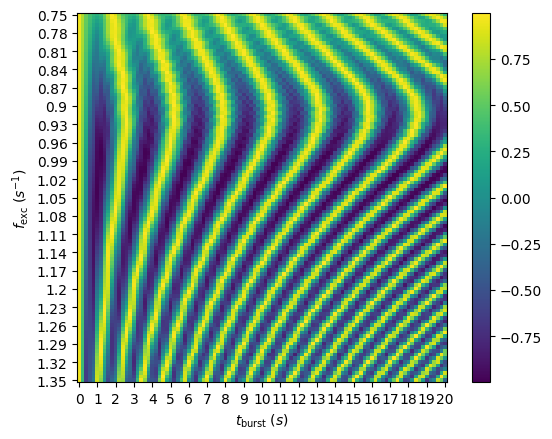

In [125]:
plt.figure()
plt.imshow(np.cos(tab_theta_XY))
plt.colorbar()
plt.xticks(np.arange(0, 101, 5), tab_t_burst[np.arange(0, 101, 5)].astype(int) ) 
plt.yticks(np.arange(0, 101, 5), exc_freq[np.arange(0, 101, 5)].round(4) ) 
plt.xlabel(r'$t_\text{burst} \; (s)$')
plt.ylabel(r'$f_\text{exc} \; (s^{-1})$')
plt.show()

In [126]:
np.savetxt('RabiXY.txt', tab_theta_XY)
import pandas as pd
DF = pd.DataFrame(tab_theta_XY) 
  
# save the dataframe as a csv file 
DF.to_csv("RabiXY.csv")

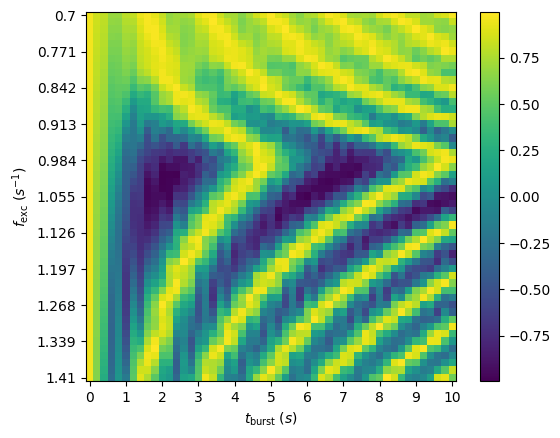

In [116]:
plt.figure()
plt.imshow(np.cos(tab_theta))
plt.colorbar()
plt.xticks(np.arange(0, 51, 5), tab_t_burst[np.arange(0, 51, 5)].astype(int) ) 
plt.yticks(np.arange(0, 51, 5), exc_freq[np.arange(0, 51, 5)].round(4) ) 
plt.xlabel(r'$t_\text{burst} \; (s)$')
plt.ylabel(r'$f_\text{exc} \; (s^{-1})$')
plt.show()

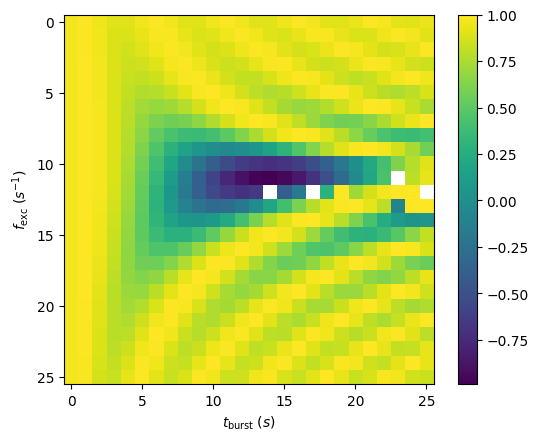

In [52]:
plt.figure()
plt.imshow(np.cos(tab_theta))
plt.colorbar()
#plt.xticks(np.arange(0, 26, 5), tab_t_burst[np.arange(0, 26, 5)].astype(int) ) 
#plt.yticks(np.arange(0, 26, 5), exc_freq[np.arange(0, 26, 5)].round(4) ) 
plt.xlabel(r'$t_\text{burst} \; (s)$')
plt.ylabel(r'$f_\text{exc} \; (s^{-1})$')
plt.show()

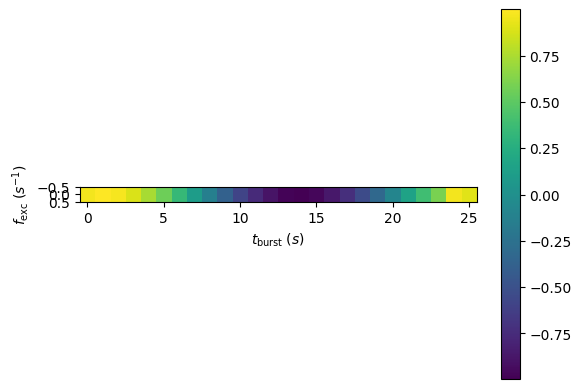

In [49]:
plt.figure()
plt.imshow(np.cos(tab_theta))
plt.colorbar()
#plt.xticks(np.arange(0, 26, 5), tab_t_burst[np.arange(0, 26, 5)].astype(int) ) 
#plt.yticks(np.arange(0, 26, 5), exc_freq[np.arange(0, 26, 5)].round(4) ) 
plt.xlabel(r'$t_\text{burst} \; (s)$')
plt.ylabel(r'$f_\text{exc} \; (s^{-1})$')
plt.show()

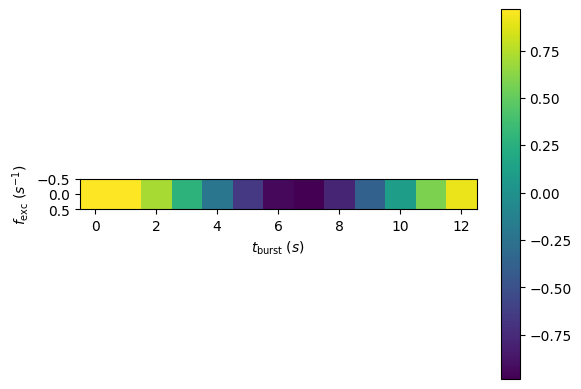

In [46]:
plt.figure()
plt.imshow(np.cos(tab_theta))
plt.colorbar()
#plt.xticks(np.arange(0, 26, 5), tab_t_burst[np.arange(0, 26, 5)].astype(int) ) 
#plt.yticks(np.arange(0, 26, 5), exc_freq[np.arange(0, 26, 5)].round(4) ) 
plt.xlabel(r'$t_\text{burst} \; (s)$')
plt.ylabel(r'$f_\text{exc} \; (s^{-1})$')
plt.show()

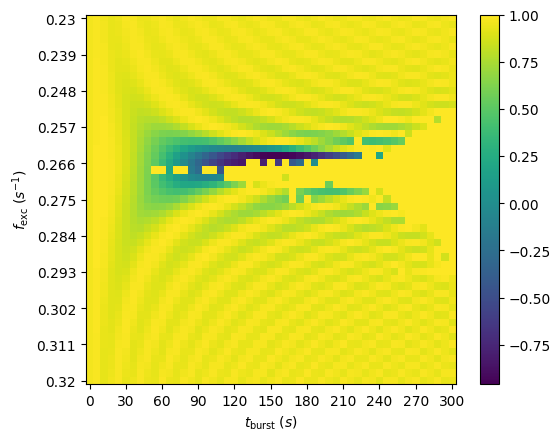

In [16]:
plt.figure()
plt.imshow(np.cos(tab_theta))
plt.colorbar()
plt.xticks(np.arange(0, 51, 5), tab_t_burst[np.arange(0, 51, 5)].astype(int) ) 
plt.yticks(np.arange(0, 51, 5), exc_freq[np.arange(0, 51, 5)].round(4) ) 
plt.xlabel(r'$t_\text{burst} \; (s)$')
plt.ylabel(r'$f_\text{exc} \; (s^{-1})$')
plt.show()

In [17]:
11401 / 3600

3.1669444444444443